In [1]:
import torch
import torch.nn as nn

from src.models import notMIWAE, LogisticMissingModel
from src.utils import normalize

In [9]:
import kagglehub as kh

from IPython.display import Audio

In [8]:
path

NameError: name 'path' is not defined

In [2]:
encoder = nn.Sequential(nn.Linear(1000,50), nn.ReLU(), nn.Linear(50,10))
decoder = nn.Sequential(nn.Linear(10,50), nn.ReLU(), nn.Linear(50,1000))
missing_model = LogisticMissingModel()

In [3]:
model = notMIWAE(encoder, decoder, missing_model, 1024, 10, 1024, 10, device = torch.device('cuda:0'))

In [6]:
x = torch.randn(64, 1000)
x = normalize(x)

s = torch.randint(0, 2, (64, 1000)).float()

In [7]:
from src.datasets import generate_synthetic_dataset

data = generate_synthetic_dataset(N = 10, T = 1000, K = 20, clipping_model="soft", W = 50, thresh = .3)

In [8]:
data[0][0]

tensor([ 0.0000,  0.4431, -0.0000, -0.0000,  0.0000,  0.0000, -0.3279,  0.4592,
        -0.0000, -0.0000, -0.4000,  0.0000,  0.0000, -0.0000, -0.3260,  0.0000,
        -0.0000, -0.3872,  0.4732, -0.0000, -0.0000, -0.4794,  0.0000,  0.0000,
        -0.3658, -0.0000, -0.0000, -0.3116, -0.0000,  0.5029, -0.6143,  0.0000,
        -0.0000,  0.0000, -0.4056, -0.0000, -0.0000, -0.0000, -0.3188, -0.0000,
         0.4271, -0.3848, -0.4794,  0.3576,  0.0000,  0.0000, -0.0000,  0.0000,
        -0.0000, -0.3532,  0.0000, -0.0000, -0.6435, -0.0000,  0.4543, -0.3041,
        -0.0000,  0.4182, -0.0000,  0.0000, -0.4943,  0.7572, -0.0000, -0.3038,
        -0.4086,  0.0000,  0.0000, -0.5196,  0.3966, -0.0000,  0.0000,  0.0000,
         0.4017, -0.0000, -0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,
        -0.5240,  0.0000,  0.0000,  0.4265, -0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000, -0.3628,  0.0000,  0.0000,  0.0000, -0.3928,
         0.5077,  0.0000, -0.0000,  0.43

In [9]:
from src.datasets import load_dataset
import torch

In [15]:
dataset_dir = "/users/eleves-b/2021/pierre.aguie/not-MIWAE-for-audio-inpainting/data/musicnet"
n_samples = 10000
window_size = 1024
dataset = load_dataset(dataset_dir, n_samples, window_size)
torch.save(dataset.x,"x_train.pt")
torch.save(dataset.s,"s_train.pt")


RuntimeError: Couldn't find appropriate backend to handle uri /users/eleves-b/2021/pierre.aguie/not-MIWAE-for-audio-inpainting/data/musicnet/s_train.pt and format None.

In [ ]:
# dataset_dir = "/mnt/c/Users/atous/Documents/musicnet/musicnet/test_data"
n_samples = 1000
window_size = 1024
dataset = load_dataset(dataset_dir, n_samples, window_size)
torch.save(dataset.x,"x_val.pt")
torch.save(dataset.s,"s_val.pt")


In [20]:
zero_mask = torch.eq(dataset.s, 0)

# Count the number of zeros
num_zeros = zero_mask.sum().item()

NameError: name 'dataset' is not defined

In [5]:
print(num_zeros)

533


In [11]:
import torchaudio
import matplotlib.pyplot as plt
from src.datasets import ClippedDataset

/tmp/ipykernel_1140538/3999070242.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load("data/musicnet/x_train.pt")
/tmp/ipykernel_1140538/3999070242.py:2: Futu

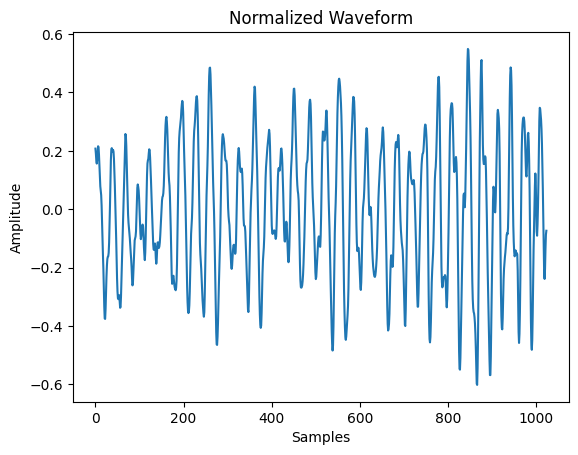

In [12]:
x = torch.load("data/musicnet/x_train.pt")
s = torch.load("data/musicnet/s_train.pt")
dataset = ClippedDataset(x, s)

plt.plot(dataset.x[1000].t().numpy())
plt.title("Normalized Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")


plt.show()


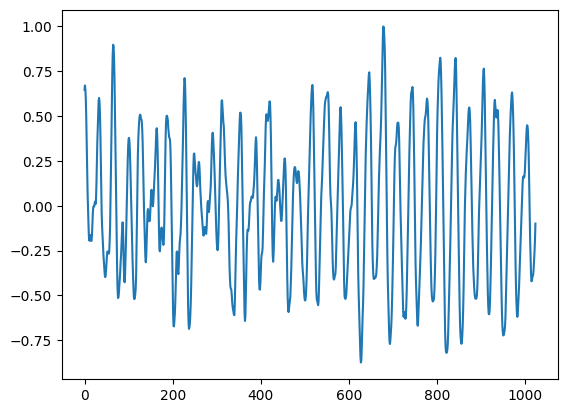

In [30]:
idx = 4
x_norm = dataset.x[idx] / torch.max(torch.abs(dataset.x[idx]))
s_norm = dataset.s[idx]

plt.plot(x_norm.t().numpy())
plt.show(
)
Audio(x_norm, rate=16000)


In [36]:
x_train = torch.load("data/musicnet/x_train.pt")
x_train = x_train / torch.max(torch.abs(x_train), axis = 1).values[:,None]

/tmp/ipykernel_1140538/3450215545.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_train = torch.load("data/musicnet/x_train.pt")


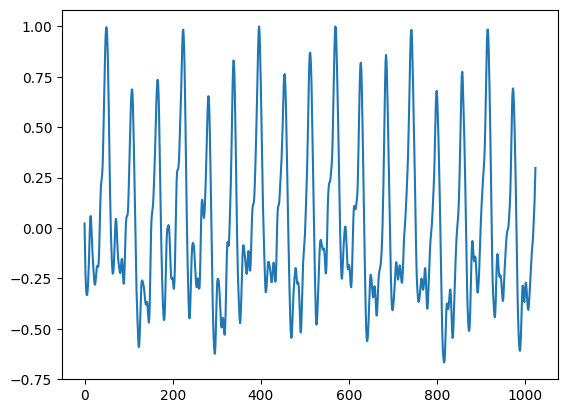

In [41]:
i = 1010
plt.plot(x_train[i].t().numpy())

In [39]:
x_val = torch.load("data/musicnet/x_val.pt")
x_val = x_val / torch.max(torch.abs(x_val), axis = 1).values[:,None]

/tmp/ipykernel_1140538/163732912.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_val = torch.load("data/musicnet/x_val.pt")


In [54]:
from src.utils import soft_clipping
s_train = soft_clipping(x_train, W = 50., b = .5)
(s_train.sum(axis = 1) / 1024).mean()

tensor(0.8164)

In [55]:
s_val = soft_clipping(x_val, W = 50., b = .5)
(s_val.sum(axis = 1) / 1024).mean()

tensor(0.8262)

In [56]:
torch.save(x_train, "data/musicnet_renorm_reclip/x_train.pt")
torch.save(x_val, "data/musicnet_renorm_reclip/x_val.pt")
torch.save(s_train, "data/musicnet_renorm_reclip/s_train.pt")
torch.save(s_val, "data/musicnet_renorm_reclip/s_val.pt")

In [6]:
for i in range(10000):
    if dataset.s[i].sum() != 1024:
        print(i, dataset.s[i].sum())


8 tensor(1020.)
29 tensor(1023.)
95 tensor(1023.)
103 tensor(1013.)
106 tensor(1009.)
114 tensor(1022.)
120 tensor(1022.)
136 tensor(1011.)
177 tensor(1022.)
179 tensor(1023.)
200 tensor(1008.)
212 tensor(1023.)
227 tensor(1023.)
259 tensor(969.)
267 tensor(1012.)
271 tensor(1013.)
278 tensor(1018.)
294 tensor(1020.)
336 tensor(956.)
337 tensor(949.)
388 tensor(1013.)
416 tensor(1012.)
418 tensor(1023.)
437 tensor(1018.)
442 tensor(1022.)
443 tensor(1021.)
444 tensor(1021.)
481 tensor(1021.)
492 tensor(970.)
506 tensor(1023.)
513 tensor(1022.)
535 tensor(1020.)
536 tensor(1019.)
549 tensor(1020.)
567 tensor(1018.)
572 tensor(1023.)
609 tensor(1023.)
644 tensor(1021.)
648 tensor(1021.)
662 tensor(1000.)
673 tensor(1014.)
674 tensor(1022.)
680 tensor(1022.)
693 tensor(1023.)
705 tensor(990.)
709 tensor(1023.)
731 tensor(1019.)
733 tensor(1016.)
736 tensor(1020.)
751 tensor(1018.)
759 tensor(1015.)
790 tensor(1006.)
796 tensor(1011.)
803 tensor(1023.)
824 tensor(1020.)
827 tensor(1023.)
8

In [1]:
import torch
import torch.nn as nn

from src.models import notMIWAE, LogisticMissingModel
from src.utils import normalize
x_train = torch.load("data/musicnet/x_train.pt", weights_only=True)
s_train = torch.load("data/musicnet/s_train.pt", weights_only=True)
x_val = torch.load("data/musicnet/x_val.pt", weights_only=True)
s_val = torch.load("data/musicnet/s_val.pt", weights_only=True)


In [2]:
from src.datasets import ClippedDataset
device = torch.device("cuda:0")
train_dataset = ClippedDataset(x_train.to(device),s_train.to(device))
val_dataset = ClippedDataset(x_val.to(device),s_val.to(device))
from torch.utils.data import Dataset, DataLoader
from src.models import AudioDecoder,AudioEncoder,notMIWAE


train_loader = DataLoader(train_dataset,64)
val_loader = DataLoader(val_dataset,64)

encoder = AudioEncoder(1024,20).to(device)
decoder = AudioDecoder(1024,20,5).to(device)
encoder.to(device)

batch,batch_gt = next(iter(train_loader))
print(batch.shape)


torch.Size([64, 1024])


In [3]:
missing_model = LogisticMissingModel(fixed_params=True).to(device)
model = notMIWAE(encoder, decoder, missing_model,1024,20,device)
model.to(device)
print(model.loss(batch,batch_gt,K=5))
from src.train_test import *
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
train(model,optimizer,train_loader,val_loader,device,100,5,1)

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
tensor(17266.2266, device='cuda:0', grad_fn=<NegBackward0>)


2024-12-13 12:53:41.400850: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-13 12:53:41.772550: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-13 12:53:42.670047: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/user/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Epoch 1/1

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])


Epoch 1/100:   7%|▋         | 11/157 [00:00<00:04, 32.67batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  11%|█         | 17/157 [00:00<00:03, 39.83batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  18%|█▊        | 29/157 [00:00<00:02, 47.17batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  26%|██▌       | 41/157 [00:00<00:02, 49.36batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  34%|███▍      | 53/157 [00:01<00:02, 50.72batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  41%|████▏     | 65/157 [00:01<00:01, 51.58batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  45%|████▌     | 71/157 [00:01<00:01, 51.98batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  53%|█████▎    | 83/157 [00:01<00:01, 52.53batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  61%|██████    | 95/157 [00:02<00:01, 52.84batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  68%|██████▊   | 107/157 [00:02<00:00, 52.61batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  76%|███████▌  | 119/157 [00:02<00:00, 52.54batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  83%|████████▎ | 131/157 [00:02<00:00, 52.50batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  87%|████████▋ | 137/157 [00:02<00:00, 52.64batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100:  95%|█████████▍| 149/157 [00:03<00:00, 52.92batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])


Epoch 1/100: 100%|██████████| 157/157 [00:03<00:00, 48.43batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 16, 1024])
torch.Size([5, 16])
torch.Size([5, 16])
torch.Size([5, 16])
torch.Size([5, 16])
Training loss for epoch 0 is 15722.715714570064
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64]

torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.

Epoch 2/100:   4%|▍         | 7/157 [00:00<00:03, 46.49batch/s]

torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64, 1024])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])
torch.Size([5, 64])


KeyboardInterrupt: 

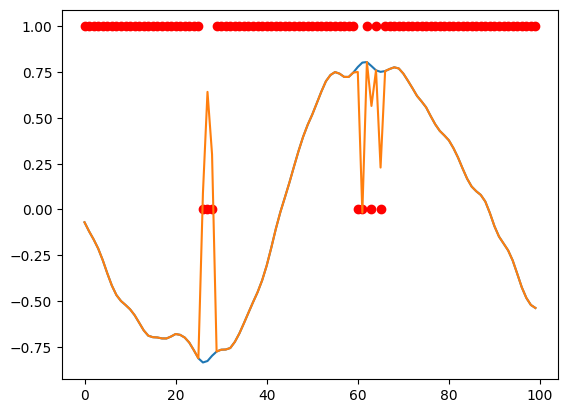

In [17]:
idx = 500
plt.plot(x_train[259].t().cpu().numpy()[idx:idx+100])
# red dots where s[259] = 1
plt.plot(s_train[259].t().cpu().numpy()[idx:idx+100], 'ro')
plt.plot(x_impute.t().cpu().detach().numpy()[idx:idx+100])

In [15]:
x_impute = model.impute(x_train[259].view(1,1024).to(device), s_train[259].view(1, 1024).to(device))